In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dell\AppData\Local\Temp\ipykernel_17532\1617675589.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_train = pd.read_csv(r'C:\Users\dell\Downloads\train.csv')
df_test = pd.read_csv(r'C:\Users\dell\Downloads\test.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Item_Weight is numerical column so we fill it with Mean Imputation

In [9]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [10]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_17532\2875213604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_17532\2875213604.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

### Outlet_Size is catagorical column so we fill it with Mode Imputation

In [13]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [14]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [15]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_17532\4104325985.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_17532\4104325985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [16]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Selecting features based on general requirements

In [18]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [19]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [20]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'reg': 'Regular', 'low fat': 'Low Fat', 'low': 'Low Fat', 'lf': 'Low Fat','LF':'Low Fat'})


# EDA with Dtale Library

In [21]:
import dtale

In [22]:
dtale.show(df_train)

Total Sales by Outlet_Location_Type:
Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

Number of Outlet_Location_Type:
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Average Sales per Outlet_Location_Type:
Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
dtype: float64


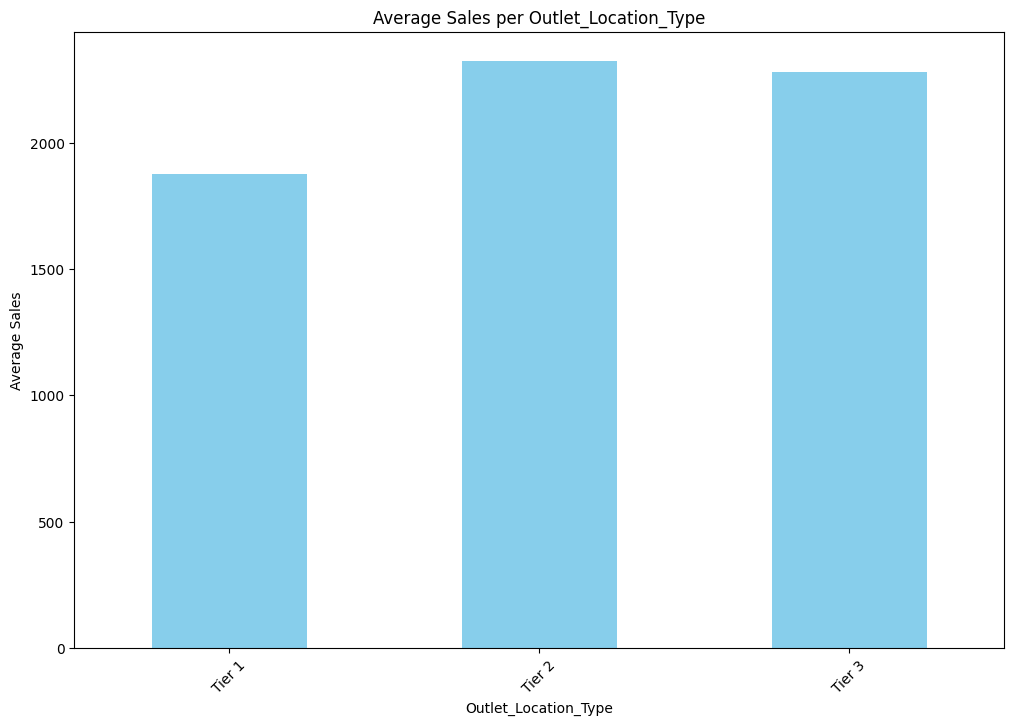

Total Sales by Outlet_Size:
Outlet_Size
High      2.142664e+06
Medium    1.188225e+07
Small     4.566212e+06
Name: Item_Outlet_Sales, dtype: float64

Number of Outlet_Size:
Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

Average Sales per Outlet_Size:
Outlet_Size
High      2298.995256
Medium    2283.730470
Small     1912.149161
dtype: float64


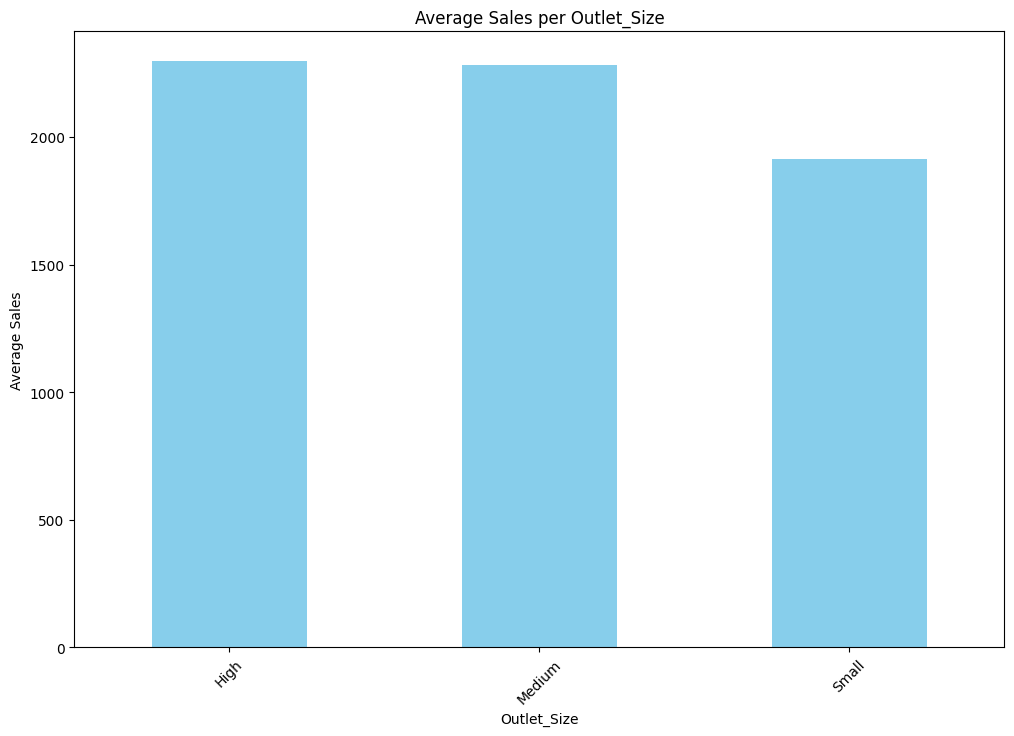

Total Sales by Outlet_Establishment_Year:
Outlet_Establishment_Year
1985    3.633620e+06
1987    2.142664e+06
1997    2.118395e+06
1998    1.883402e+05
1999    2.183970e+06
2002    2.036725e+06
2004    2.268123e+06
2007    2.167465e+06
2009    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64

Number of Outlet_Establishment_Year:
Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

Average Sales per Outlet_Establishment_Year:
Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
dtype: float64


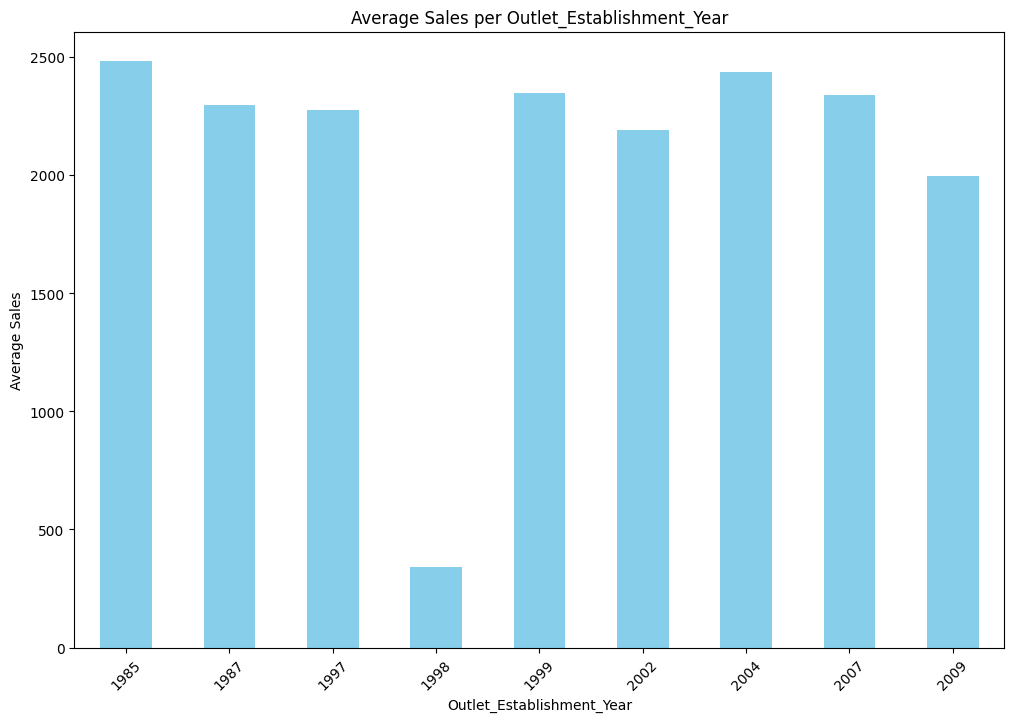

Total Sales by Item_Type:
Item_Type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Outlet_Sales, dtype: float64

Number of Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat          

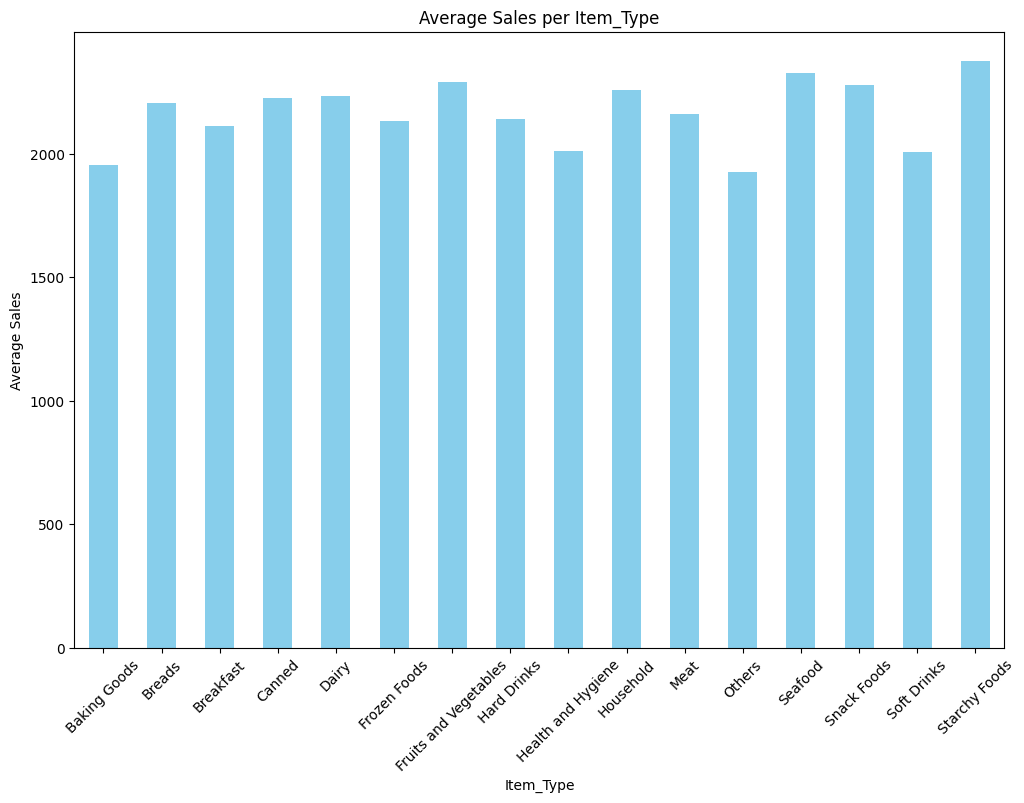

Total Sales by Outlet_Type:
Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

Number of Outlet_Type:
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

Average Sales per Outlet_Type:
Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
dtype: float64


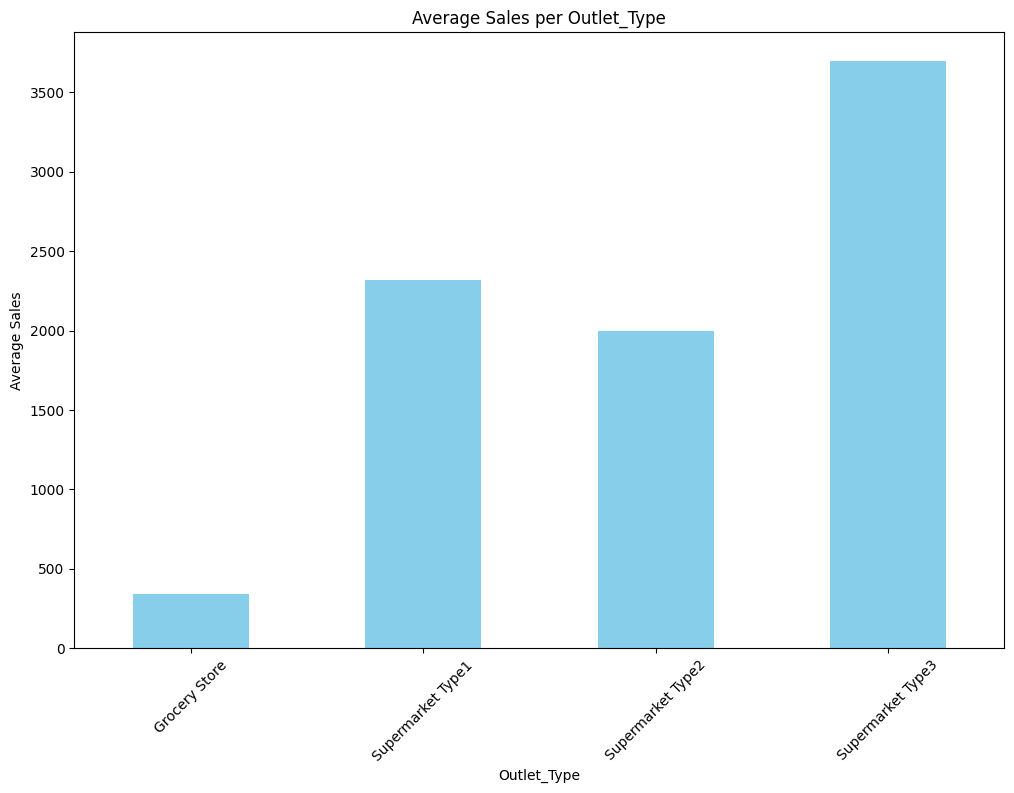

Total Sales by Item_Fat_Content:
Item_Fat_Content
Low Fat    1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

Number of Item_Fat_Content:
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Average Sales per Item_Fat_Content:
Item_Fat_Content
Low Fat    2157.711534
Regular    2224.561170
dtype: float64


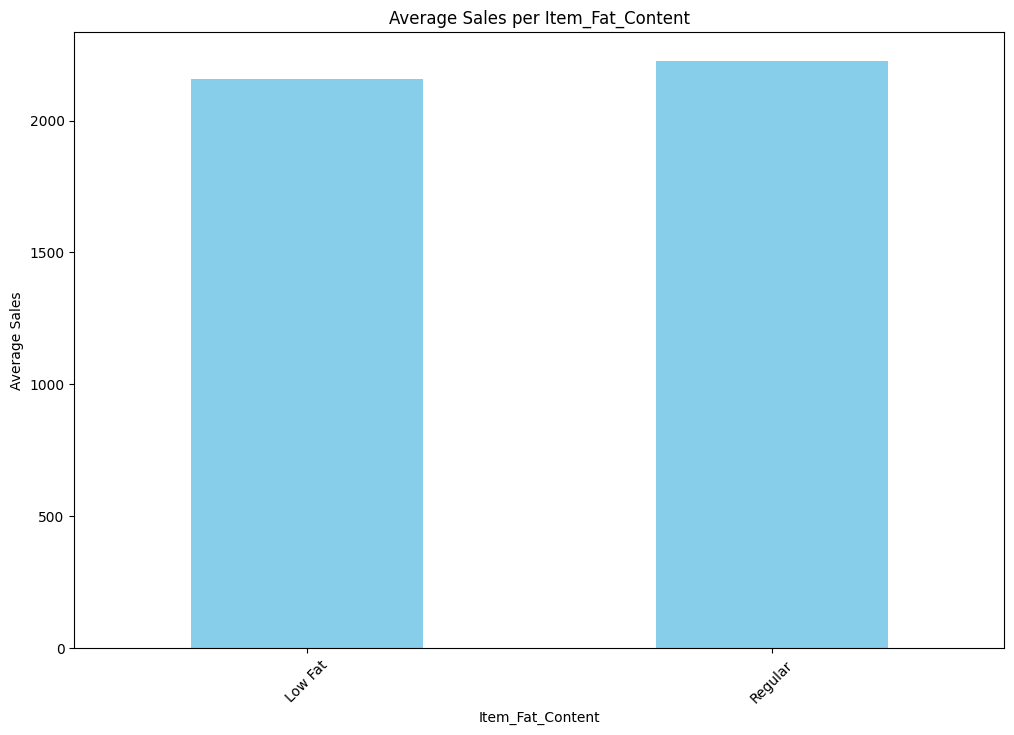

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (commented out as you already have df_train)
# df_train = pd.read_csv('path_to_your_data.csv')

# List of categorical features to analyze
categorical_features = ['Outlet_Location_Type', 'Outlet_Size', 'Outlet_Establishment_Year','Item_Type','Outlet_Type','Item_Fat_Content']

def plot_average_sales_by_feature(feature_name):
    # Calculate total sales for each category in the feature
    total_sales_by_feature = df_train.groupby(feature_name)['Item_Outlet_Sales'].sum()

    # Count the number of each category in the feature
    count_by_feature = df_train[feature_name].value_counts()

    # Calculate the average sales per category
    average_sales_by_feature = total_sales_by_feature / count_by_feature

    # Print the results
    print(f"Total Sales by {feature_name}:")
    print(total_sales_by_feature)
    print(f"\nNumber of {feature_name}:")
    print(count_by_feature)
    print(f"\nAverage Sales per {feature_name}:")
    print(average_sales_by_feature)

    # Create a bar chart for visualization
    plt.figure(figsize=(12, 8))
    average_sales_by_feature.plot(kind='bar', color='skyblue')
    plt.title(f'Average Sales per {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Average Sales')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# Analyze each feature in the list
for feature in categorical_features:
    plot_average_sales_by_feature(feature)


Total Sales by Item Type:
Item_Type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Outlet_Sales, dtype: float64

Number of Items by Item Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat 

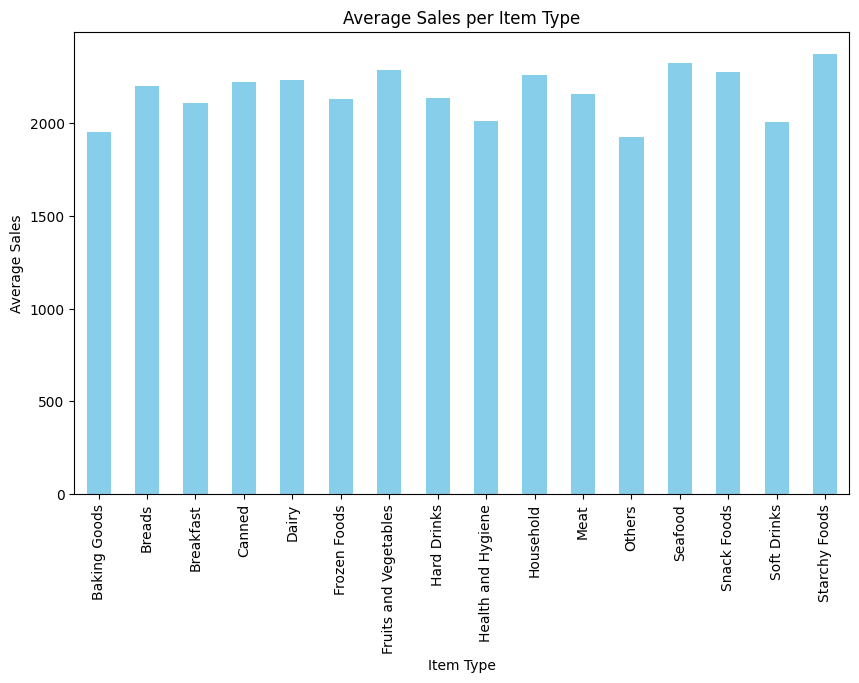

In [24]:
#from pandas_profiling import ProfileReportimport pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (commented out as you already have df_train)
# df_train = pd.read_csv('path_to_your_data.csv')

# Calculate total sales for each item type
total_sales_by_item_type = df_train.groupby('Item_Type')['Item_Outlet_Sales'].sum()

# Count the number of each item type
item_count_by_type = df_train['Item_Type'].value_counts()

# Calculate the average sales per item type
average_sales_per_item_type = total_sales_by_item_type / item_count_by_type

# Print the results
print("Total Sales by Item Type:")
print(total_sales_by_item_type)
print("\nNumber of Items by Item Type:")
print(item_count_by_type)
print("\nAverage Sales per Item Type:")
print(average_sales_per_item_type)

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
average_sales_per_item_type.plot(kind='bar', color='skyblue')
plt.title('Average Sales per Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [25]:
#profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [26]:
#profile

C:\Users\dell\AppData\Local\Temp\ipykernel_17532\4226096331.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




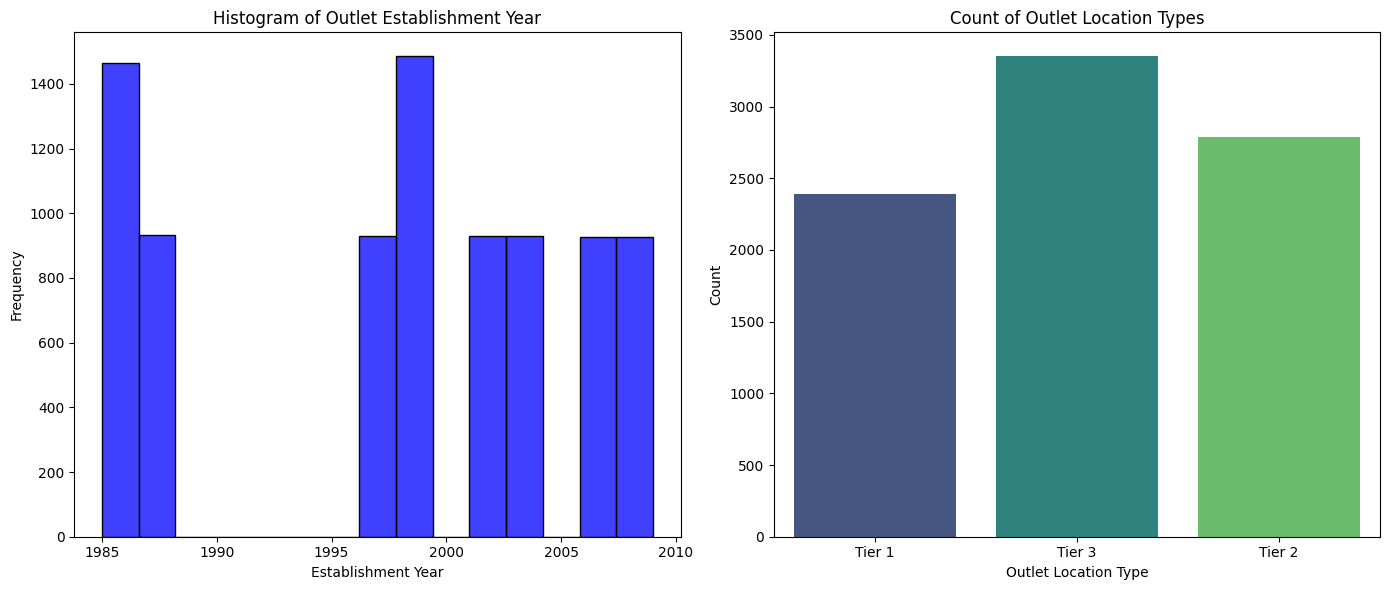

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Histogram for Outlet Establishment Year
plt.subplot(1, 2, 1)
sns.histplot(df_train['Outlet_Establishment_Year'], kde=False, bins=15, color='blue')
plt.title('Histogram of Outlet Establishment Year')
plt.xlabel('Establishment Year')
plt.ylabel('Frequency')

# Histogram for Outlet Location Type
plt.subplot(1, 2, 2)
sns.countplot(x='Outlet_Location_Type', data=df_train, palette='viridis')
plt.title('Count of Outlet Location Types')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


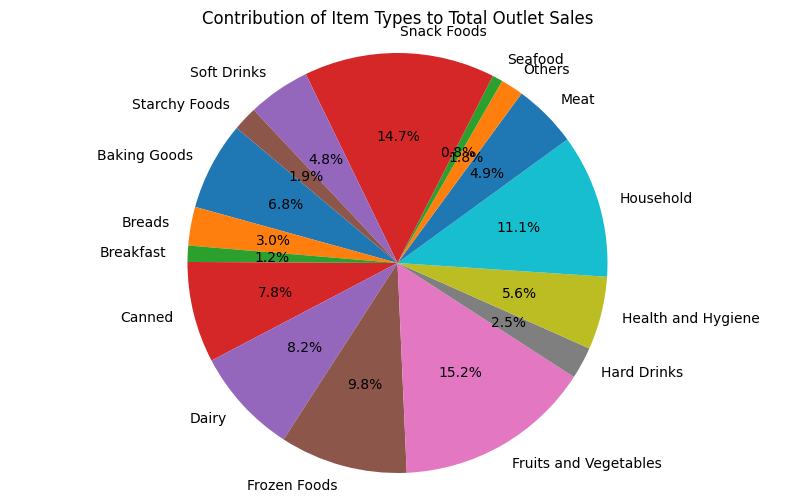

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (commented out as you already have df_train)
# df_train = pd.read_csv('path_to_your_data.csv')

# Calculate total sales for each item type
total_sales_by_item_type = df_train.groupby('Item_Type')['Item_Outlet_Sales'].sum()

# Calculate the percentage contribution of each item type to total sales
percentage_contribution = (total_sales_by_item_type / total_sales_by_item_type.sum()) * 100

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(percentage_contribution, labels=percentage_contribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Contribution of Item Types to Total Outlet Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


         Outlet_Type  Item_Outlet_Sales  Contribution_Percentage
0      Grocery Store       3.680343e+05                 1.979623
1  Supermarket Type1       1.291734e+07                69.481228
2  Supermarket Type2       1.851823e+06                 9.960789
3  Supermarket Type3       3.453926e+06                18.578359


C:\Users\dell\AppData\Local\Temp\ipykernel_17532\1010156059.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




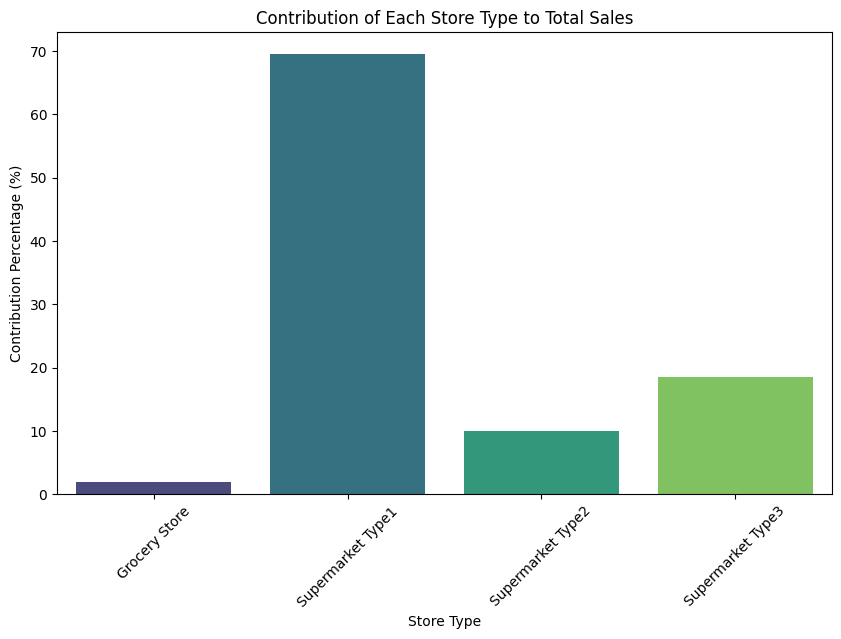

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train is already loaded and contains columns 'Outlet_Type' and 'Item_Outlet_Sales'

# Group by 'Outlet_Type' and calculate total sales for each type
sales_per_store_type = df_train.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index()

# Calculate the total sales and the contribution percentage of each store type
total_sales = sales_per_store_type['Item_Outlet_Sales'].sum()
sales_per_store_type['Contribution_Percentage'] = (sales_per_store_type['Item_Outlet_Sales'] / total_sales) * 100

# Print the data to inspect
print(sales_per_store_type)

# Plot the contribution per store type
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Type', y='Contribution_Percentage', data=sales_per_store_type, palette='viridis')
plt.title('Contribution of Each Store Type to Total Sales')
plt.xlabel('Store Type')
plt.ylabel('Contribution Percentage (%)')
plt.xticks(rotation=45)
plt.show()


Total Sales by Store Type:
Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

Number of Stores by Store Type:
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

Average Sales per Store Type:
Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
dtype: float64


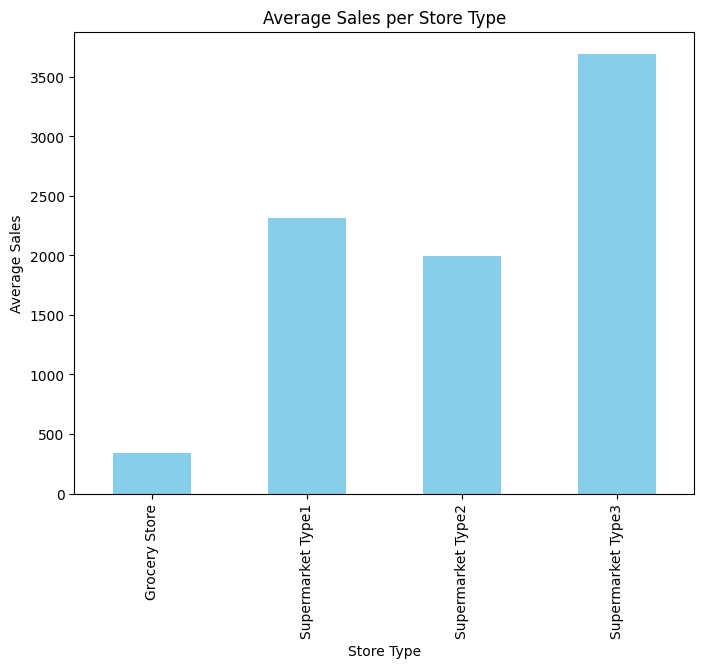

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (commented out as you already have df_train)
# df_train = pd.read_csv('path_to_your_data.csv')

# Calculate total sales for each store type
total_sales_by_store_type = df_train.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

# Count the number of each store type
store_count_by_type = df_train['Outlet_Type'].value_counts()

# Calculate the average sales per store type
average_sales_per_store_type = total_sales_by_store_type / store_count_by_type

# Print the results
print("Total Sales by Store Type:")
print(total_sales_by_store_type)
print("\nNumber of Stores by Store Type:")
print(store_count_by_type)
print("\nAverage Sales per Store Type:")
print(average_sales_per_store_type)

# Create a bar chart for visualization
plt.figure(figsize=(8, 6))
average_sales_per_store_type.plot(kind='bar', color='skyblue')
plt.title('Average Sales per Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.show()


# EDA using Klib Library

In [31]:
import klib

GridSpec(6, 5)

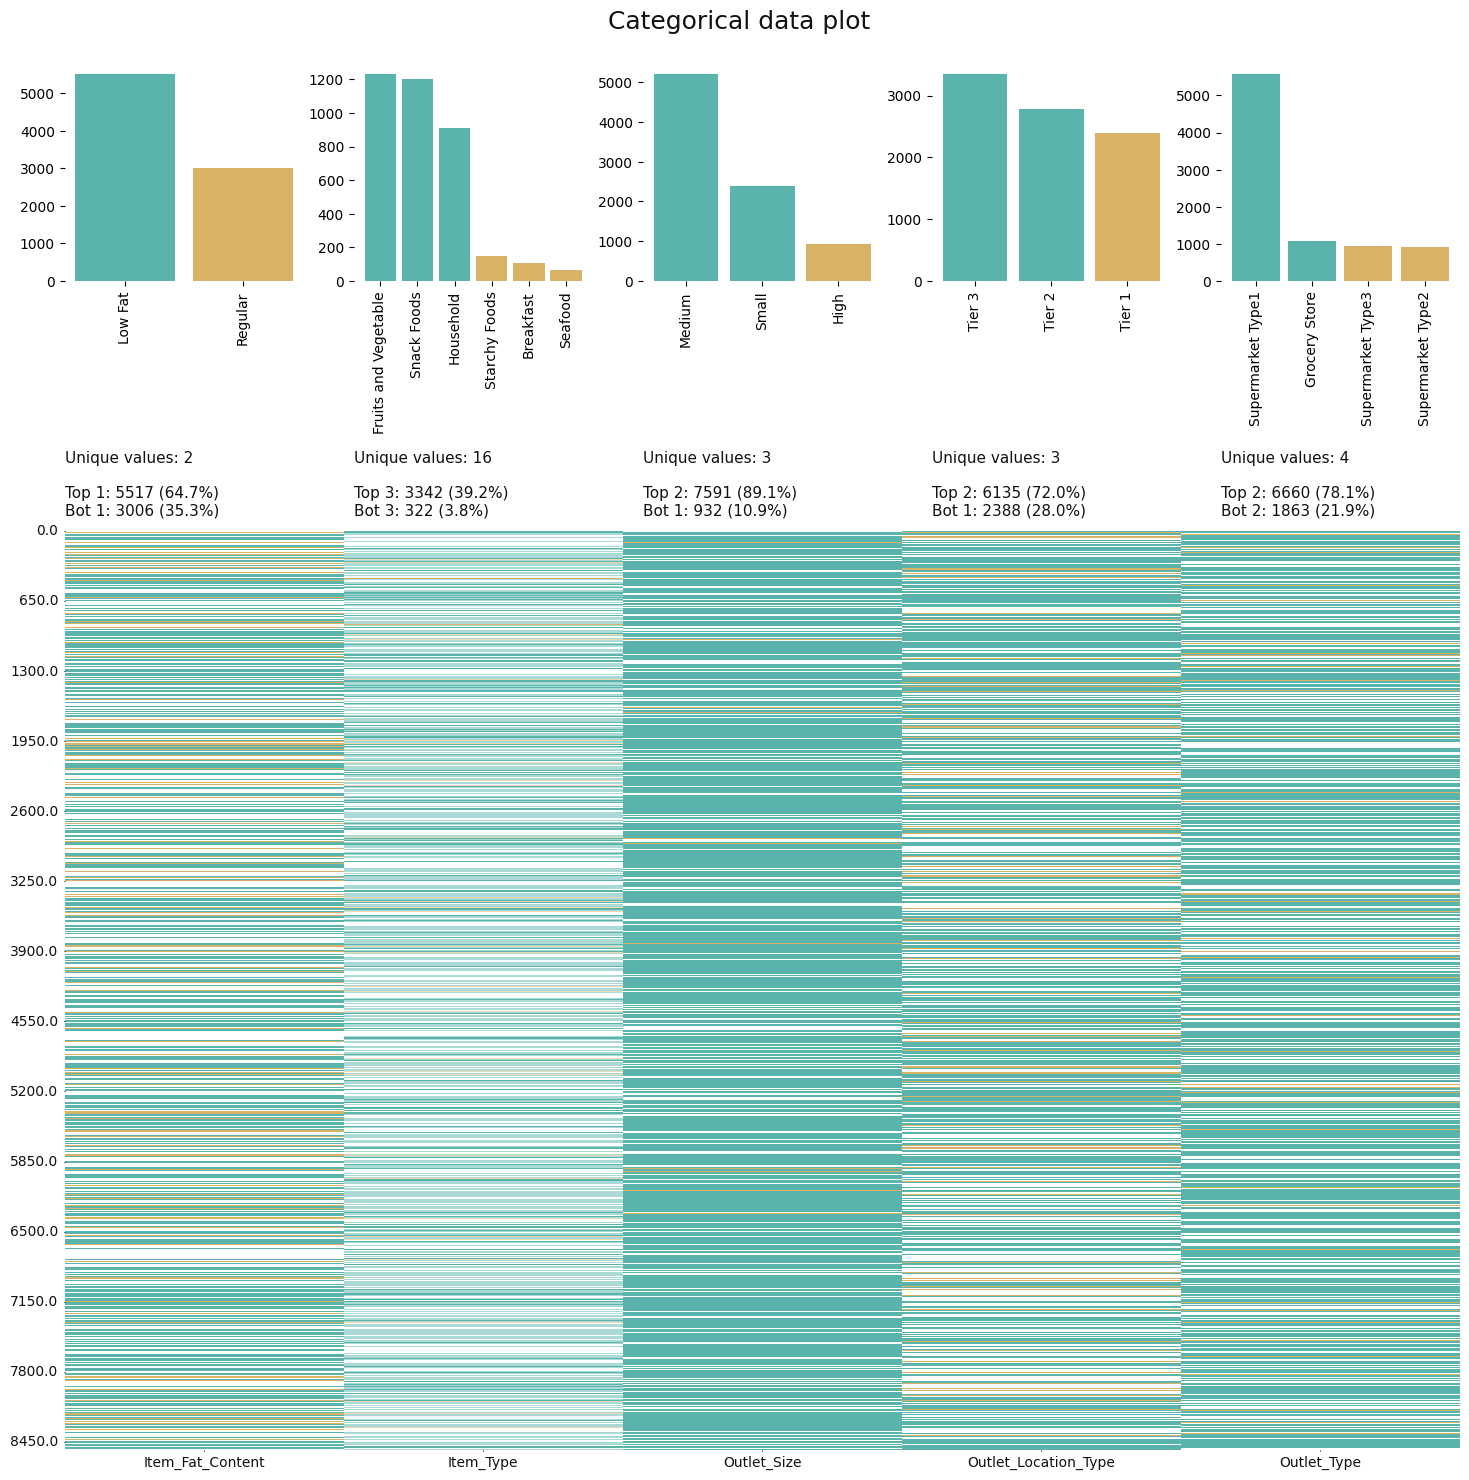

In [32]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(df_train) # returns a visualization of the number and frequency of categorical features


In [33]:
klib.corr_mat(df_train) # returns a color-encoded correlation matrix


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\klib\describe.py:271: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

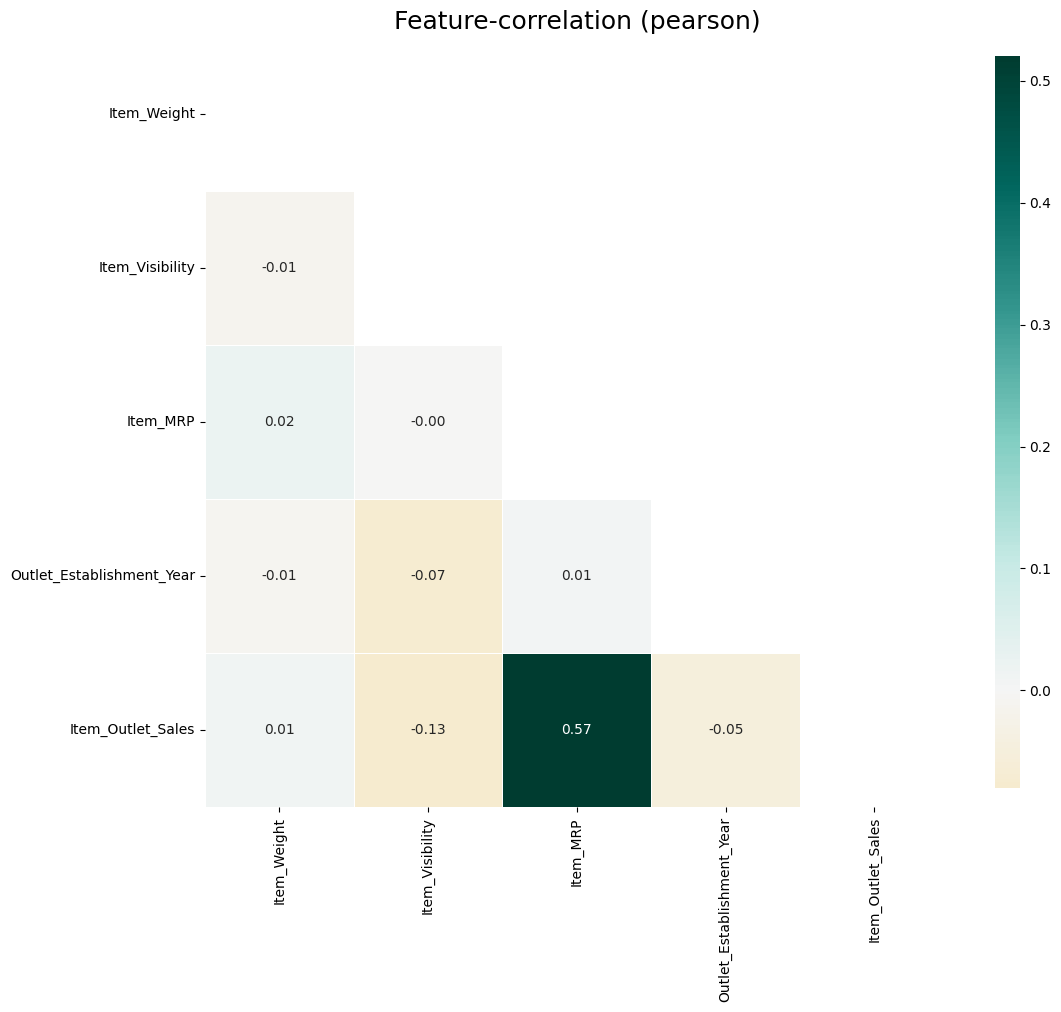

In [34]:
klib.corr_plot(df_train) # returns a color-encoded heatmap, ideal for correlations


<Axes: xlabel='Item_Weight', ylabel='Density'>

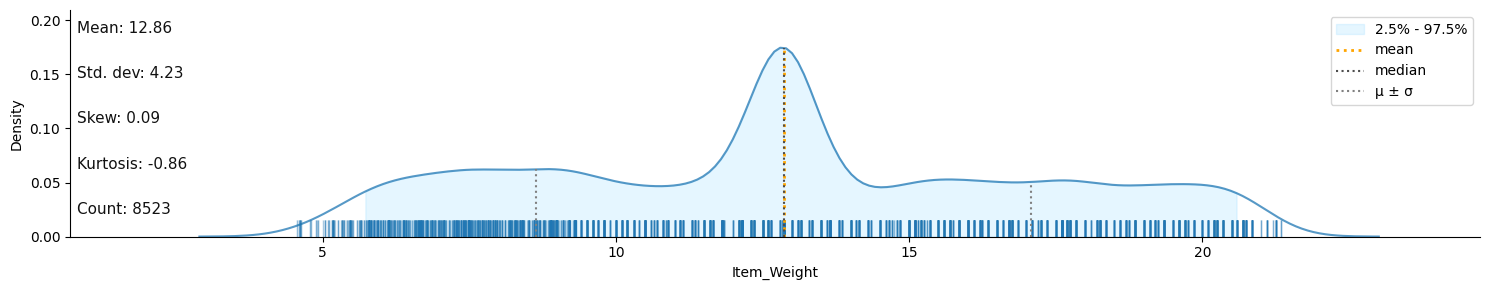

In [35]:
klib.dist_plot(df_train) # returns a distribution plot for every numeric feature


In [36]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values

No missing values found in the dataset.


# Data Cleaning using Klib Library

In [37]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)


Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [38]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [40]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.8 KB


In [41]:
klib.mv_col_handling(df_train)

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\klib\clean.py:436: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


# Preprocessing Task before Model Building

## 1) Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])

In [44]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,0,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,1,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,0,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,1,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,0,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,1,0.046982,0,108.156998,2002,1,1,1,549.284973
8520,10.600000,0,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,1,0.145221,13,103.133202,2009,1,2,2,1845.597656


# 2) Splitting our data into train and test

Linear Regression - Mean Absolute Error: 856.03
Linear Regression - R² Score: 0.52
Linear Regression - Accuracy Percentage: 59.18%

Random Forest - Mean Absolute Error: 719.59
Random Forest - R² Score: 0.61
Random Forest - Accuracy Percentage: 65.68%

Gradient Boosting - Mean Absolute Error: 720.25
Gradient Boosting - R² Score: 0.61
Gradient Boosting - Accuracy Percentage: 65.65%

XGBoost - Mean Absolute Error: 719.89
XGBoost - R² Score: 0.62
XGBoost - Accuracy Percentage: 65.67%



C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


7 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\catboost\core.py", line 5827, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
    

CatBoost - Mean Absolute Error: 713.72
CatBoost - R² Score: 0.62
CatBoost - Accuracy Percentage: 65.97%

Stacking Model - Mean Absolute Error: 723.37
Stacking Model - R² Score: 0.60
Stacking Model - Accuracy Percentage: 65.50%


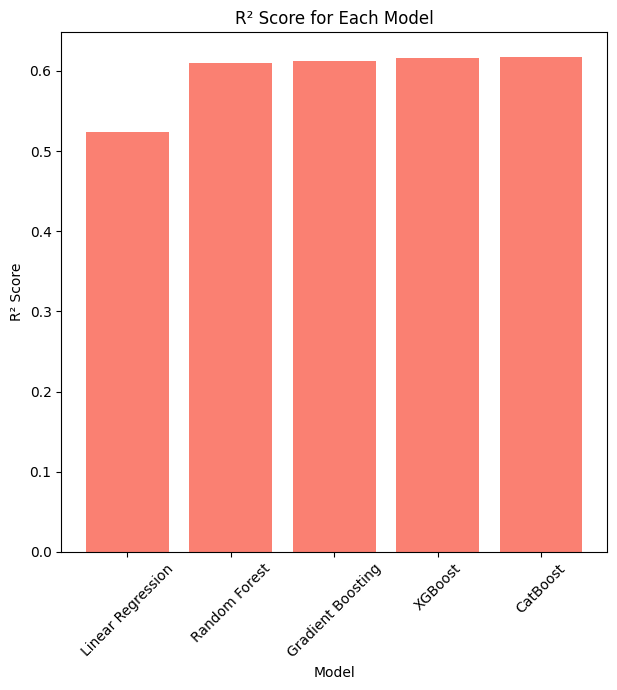

"import pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split, RandomizedSearchCV\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_absolute_error, r2_score\nfrom xgboost import XGBRegressor\nfrom lightgbm import LGBMRegressor\nfrom catboost import CatBoostRegressor\nimport matplotlib.pyplot as plt\nfrom scipy.stats import uniform, randint\n\n# Assuming df_train is your DataFrame after label encoding\n# Splitting data into features (X) and target (y)\nX = df_train.drop('item_outlet_sales', axis=1)  # Replace 'item_outlet_sales' with your actual target column name\ny = df_train['item_outlet_sales']\n\n# Splitting into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Feature scaling\nscaler = StandardSca

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import joblib
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

# Assuming df_train is your DataFrame after label encoding
X = df_train.drop('item_outlet_sales', axis=1)
y = df_train['item_outlet_sales']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Save the StandardScaler object
joblib.dump(scaler, r'C:\Users\dell\Desktop\Big Mart Sales Analysis NTCC\BigMart-Sales-Prediction-With-Deployment\models\scaler.sav')

# Define hyperparameter grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': randint(100, 500),
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 20)
    },
    'Gradient Boosting': {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 10),
        'subsample': uniform(0.5, 0.5),
        'min_samples_split': randint(2, 20)
    },
    'XGBoost': {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 10),
        'subsample': uniform(0.5, 0.5),
        'colsample_bytree': uniform(0.5, 0.5),
        'gamma': uniform(0, 5)
    },
    'LGBM': {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 10),
        'num_leaves': randint(20, 100),
        'subsample': uniform(0.5, 0.5)
    },
    'CatBoost': {
        'depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.2),
        'iterations': randint(100, 500),
        'l2_leaf_reg': uniform(1, 10),
        'border_count': randint(32, 255)
    }
}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(silent=True)
}

# Initialize dictionaries to store results
mae_dict = {}
r2_dict = {}
accuracy_percentage_dict = {}
best_overall_model = None
best_overall_mae = float('inf')

for model_name, model in models.items():
    if model_name in param_grids:
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[model_name],
            n_iter=20,
            cv=5,
            scoring='neg_mean_absolute_error',
            random_state=42,
            n_jobs=-1
        )
        random_search.fit(X_train_scaled, y_train)
        best_model = random_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
    
    y_pred = best_model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mean_target = y_test.mean()
    relative_mae = mae / mean_target * 100
    accuracy_percentage = 100 - relative_mae
    
    mae_dict[model_name] = mae
    r2_dict[model_name] = r2
    accuracy_percentage_dict[model_name] = accuracy_percentage
    
    if mae < best_overall_mae:
        best_overall_mae = mae
        best_overall_model = best_model
    
    print(f'{model_name} - Mean Absolute Error: {mae:.2f}')
    print(f'{model_name} - R² Score: {r2:.2f}')
    print(f'{model_name} - Accuracy Percentage: {accuracy_percentage:.2f}%')
    print()

# Save the best overall model
if best_overall_model:
    joblib.dump(best_overall_model, r'C:\Users\dell\Desktop\Big Mart Sales Analysis NTCC\BigMart-Sales-Prediction-With-Deployment\models\best_model.sav')

# Optional: Stacking Model
# Define base models for stacking
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

# Define meta model
meta_model = GradientBoostingRegressor(random_state=42)

# Create stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Evaluate stacking model
stacking_model.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_model.predict(X_test_scaled)

mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)
relative_mae_stacking = mae_stacking / mean_target * 100
accuracy_percentage_stacking = 100 - relative_mae_stacking

print(f'Stacking Model - Mean Absolute Error: {mae_stacking:.2f}')
print(f'Stacking Model - R² Score: {r2_stacking:.2f}')
print(f'Stacking Model - Accuracy Percentage: {accuracy_percentage_stacking:.2f}%')

# Plotting the results
plt.figure(figsize=(18, 7))


# Plot R² Score
plt.subplot(1, 3, 2)
plt.bar(r2_dict.keys(), r2_dict.values(), color='salmon')
plt.title('R² Score for Each Model')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()
'''import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

# Assuming df_train is your DataFrame after label encoding
# Splitting data into features (X) and target (y)
X = df_train.drop('item_outlet_sales', axis=1)  # Replace 'item_outlet_sales' with your actual target column name
y = df_train['item_outlet_sales']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grids for each model

# Random Forest
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Gradient Boosting
param_dist_gb = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
    'min_samples_split': randint(2, 20)
}

# XGBoost
param_dist_xgb = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5)
}

# LGBM
param_dist_lgbm = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'num_leaves': randint(20, 100),
    'subsample': uniform(0.5, 0.5)
}

# CatBoost
param_dist_catboost = {
    'depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'iterations': randint(100, 500),
    'l2_leaf_reg': uniform(1, 10),
    'border_count': randint(32, 255)
}

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    #'LGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(silent=True)
}

param_grids = {
    'Random Forest': param_dist_rf,
    'Gradient Boosting': param_dist_gb,
    'XGBoost': param_dist_xgb,
    'LGBM': param_dist_lgbm,
    'CatBoost': param_dist_catboost
}

# Initialize dictionaries to store results
mae_dict = {}
r2_dict = {}
accuracy_percentage_dict = {}

for model_name, model in models.items():
    if model_name in param_grids:
        # Apply RandomizedSearchCV for hyperparameter tuning
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[model_name],
            n_iter=20,  # Increased number of iterations for better tuning
            cv=5,
            scoring='neg_mean_absolute_error',
            random_state=42,
            n_jobs=-1
        )
        random_search.fit(X_train_scaled, y_train)
        best_model = random_search.best_estimator_
    else:
        # For models without hyperparameter tuning
        best_model = model
        best_model.fit(X_train_scaled, y_train)
    
    y_pred = best_model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mean_target = y_test.mean()
    relative_mae = mae / mean_target * 100
    accuracy_percentage = 100 - relative_mae
    
    mae_dict[model_name] = mae
    r2_dict[model_name] = r2
    accuracy_percentage_dict[model_name] = accuracy_percentage
    
    print(f'{model_name} - Mean Absolute Error: {mae:.2f}')
    print(f'{model_name} - R² Score: {r2:.2f}')
    print(f'{model_name} - Accuracy Percentage: {accuracy_percentage:.2f}%')
    print()

# Optional: Stacking Model
# Define base models for stacking
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

# Define meta model
meta_model = GradientBoostingRegressor(random_state=42)

# Create stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Evaluate stacking model
stacking_model.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_model.predict(X_test_scaled)

mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)
relative_mae_stacking = mae_stacking / mean_target * 100
accuracy_percentage_stacking = 100 - relative_mae_stacking

print(f'Stacking Model - Mean Absolute Error: {mae_stacking:.2f}')
print(f'Stacking Model - R² Score: {r2_stacking:.2f}')
print(f'Stacking Model - Accuracy Percentage: {accuracy_percentage_stacking:.2f}%')

# Plotting the results
plt.figure(figsize=(18, 7))

# Plot MAE
plt.subplot(1, 3, 1)
plt.bar(mae_dict.keys(), mae_dict.values(), color='skyblue')
plt.title('Mean Absolute Error for Each Model')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)

# Plot R² Score
plt.subplot(1, 3, 2)
plt.bar(r2_dict.keys(), r2_dict.values(), color='salmon')
plt.title('R² Score for Each Model')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)

# Plot Accuracy Percentage
plt.subplot(1, 3, 3)
plt.bar(accuracy_percentage_dict.keys(), accuracy_percentage_dict.values(), color='lightgreen')
plt.title('Accuracy Percentage for Each Model')
plt.xlabel('Model')
plt.ylabel('Accuracy Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()'''


In [ ]:
'''import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have your data in variables `X` and `y`
# Example data (replace with your actual data)
# X, y = your_data_features, your_data_target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

# Predict using the Linear Regression model
y_pred_linear = linear_regressor.predict(X_test_scaled)

# Number of points to sample
num_points = 500  # You can adjust this to 1000 or any other number

# Ensure we don't sample more points than available in the test set
num_points = min(num_points, len(y_test))

# Randomly sample indices from the test set
sample_indices = random.sample(range(len(y_test)), num_points)

# Sample the actual and predicted values using the sampled indices
y_test_sampled = y_test.iloc[sample_indices]
y_pred_linear_sampled = y_pred_linear[sample_indices]

# Create scatter plot with the sampled data
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sampled, y_pred_linear_sampled, alpha=0.5, label='Actual vs Predicted')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted Sales (Sampled Data)")

# Add line of best fit
x = np.linspace(min(y_test), max(y_test), 100)
y = x
plt.plot(x, y, color='red', label='Line of Best Fit')

plt.legend()
plt.show()
'''

In [ ]:
'''X=df_train.drop('item_outlet_sales',axis=1)'''

In [ ]:
'''Y=df_train['item_outlet_sales']'''

In [ ]:
'''from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)'''

# 3) Standarization 

In [ ]:
X.describe()

In [ ]:
'''from sklearn.preprocessing import StandardScaler
sc= StandardScaler()'''

In [ ]:
'''X_train_std= sc.fit_transform(X_train)'''

In [ ]:
'''X_test_std= sc.transform(X_test)'''

In [ ]:
'''X_train_std'''

In [ ]:
'''X_test_std'''

In [ ]:
'''Y_train'''

In [ ]:
'''Y_test'''

In [ ]:
import joblib

In [ ]:
joblib.dump(sc,r'C:\Users\dell\Desktop\Big Mart Sales Analysis NTCC\BigMart-Sales-Prediction-With-Deployment\models\sc.sav')

# Model Building

In [ ]:
'''from sklearn.linear_model import LinearRegression
lr = LinearRegression()'''

In [ ]:
'''lr.fit(X_train_std,Y_train)'''

In [ ]:
'''X_test.head()'''

In [ ]:
'''Y_pred_lr=lr.predict(X_test_std)'''

In [ ]:
'''from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error'''

In [ ]:
'''print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))
'''

In [ ]:
'''joblib.dump(lr,r'C:\Users\dell\Desktop\Big Mart Sales Analysis NTCC\BigMart-Sales-Prediction-With-Deployment\models\lr.sav')'''

In [ ]:
'''from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)'''

In [ ]:
'''rf.fit(X_train_std,Y_train)'''

In [ ]:
'''Y_pred_rf= rf.predict(X_test_std)'''

In [ ]:
'''print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))
'''

In [ ]:
#joblib.dump(rf,r'C:\Users\dell\Desktop\Big Mart Sales Analysis NTCC\BigMart-Sales-Prediction-With-Deployment\models\rf.sav')

# Hyper Parameter Tuning

In [ ]:
'''
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")'''

In [ ]:
'''from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Support Vector Regressor
svm_model = SVR(kernel='rbf')  # rbf kernel is commonly used for non-linear relationships

# Train the model
svm_model.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate performance
mae_svm = mean_absolute_error(Y_test, Y_pred_svm)
print(f'SVM Mean Absolute Error: {mae_svm}')
'''

In [ ]:
'''import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(Y_test, Y_pred_xgb)
print(f'XGBoost Mean Absolute Error: {mae_xgb}')
'''

# Save your model

In [ ]:
#joblib.dump(grid_search_forest,r'D:\Python37\Projects\iNeuron Intership Projects\ML_BigMart Sales Prediction\models\random_forest_grid.sav')

In [ ]:
#model=joblib.load(r'D:\Python37\Projects\iNeuron Intership Projects\ML_BigMart Sales Prediction\models\random_forest_grid.sav')